In [283]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [284]:
#Loading database
anemia_data = pd.read_csv('/content/drive/MyDrive/anemia.csv')

In [285]:
# first 5 row in
anemia_data.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [286]:
anemia_data.shape

(1421, 6)

In [287]:
#Count of different label
anemia_data['Result'].value_counts()

,count
Result,
0,801
1,620


In [288]:
anemia_data.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [289]:
anemia_data.groupby('Result').mean()

,Gender,Hemoglobin,MCH,MCHC,MCV
Result,,,,,
0,0.409488,14.795506,23.005743,30.192010,85.698127
1,0.664516,11.626290,22.776290,30.327742,85.298548


In [290]:
anemia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [291]:
aneamia_data_zero=anemia_data[anemia_data['Result']==0]
aneamia_data_one=anemia_data[anemia_data['Result']==1]

In [292]:
aneamia_data_zero=aneamia_data_zero.sample(n=620)
aneamia_data=pd.concat([aneamia_data_zero,aneamia_data_one],axis=0)

In [293]:
aneamia_data['Result'].value_counts()

,count
Result,
0,620
1,620


In [294]:
#null
anemia_data.isnull().sum()

,0
Gender,0
Hemoglobin,0
MCH,0
MCHC,0
MCV,0
Result,0


In [295]:
anemia_data.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [296]:
# drop
X = anemia_data.drop(columns='Result', axis=1)
Y = anemia_data['Result']

In [297]:
print(X)
print(Y)

      Gender  Hemoglobin   MCH  MCHC   MCV
0          1        14.9  22.7  29.1  83.7
1          0        15.9  25.4  28.3  72.0
2          0         9.0  21.5  29.6  71.2
3          0        14.9  16.0  31.4  87.5
4          1        14.7  22.0  28.2  99.5
...      ...         ...   ...   ...   ...
1416       0        10.6  25.4  28.2  82.9
1417       1        12.1  28.3  30.4  86.9
1418       1        13.1  17.7  28.1  80.7
1419       0        14.3  16.2  29.5  95.2
1420       0        11.8  21.2  28.4  98.1

[1421 rows x 5 columns]
0       0
1       0
2       1
3       0
4       0
       ..
1416    1
1417    1
1418    1
1419    0
1420    1
Name: Result, Length: 1421, dtype: int64


In [298]:
# we'll split the data into training and testing sets. We'll use 80% of the data for training and 20% for testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42 )

In [299]:
print(X.shape, X_train.shape, X_test.shape)

(1421, 5) (1136, 5) (285, 5)


In [300]:
#Data standardization
scaler = StandardScaler()

In [301]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [302]:
#Model Training
#SVM
classfiier = svm.SVC(kernel = 'linear')

In [303]:
# Training the support vector machine
classfiier.fit(X_train_scaled , Y_train)

SVC(kernel='linear')

In [304]:
# model evalution
#Accuracy score
X_train_prediction = classfiier.predict(X_train_scaled)
training_data_accuracy = accuracy_score(X_train_prediction , Y_train)

In [305]:
print('Accuracy score of the training data : ' , training_data_accuracy)

Accuracy score of the training data :  0.9894366197183099


In [306]:
X_test_prediction = classfiier.predict(X_test_scaled)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)

In [307]:
print('Accuracy score of the test data : ' , test_data_accuracy)

Accuracy score of the test data :  0.9894736842105263


In [308]:
# Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)
print(cm)
print("",classification_report(Y_test,X_test_prediction))

[[158   3]
 [  0 124]]
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       161
           1       0.98      1.00      0.99       124

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285



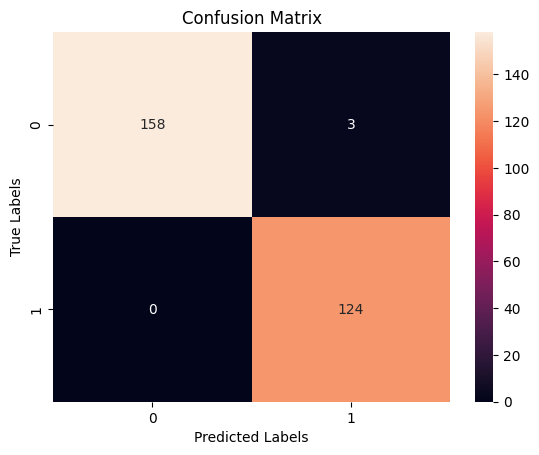

In [309]:
# Heatmap Visualization
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [310]:
anemia = classfiier.predict(X_test_scaled)

In [311]:
print(classification_report(Y_test,anemia))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       161
           1       0.98      1.00      0.99       124

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285



Prediction System

In [312]:
input_data = (0,16.3,21.6,32.3,98.4)
#Changing input_data  to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

print(input_data_reshaped)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classfiier.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('Anemia detected')
else:
  print('Anemia  not detected')

[[ 0.  16.3 21.6 32.3 98.4]]
[[-1.05428846  1.47409808 -0.33064492  1.45071318  1.33084525]]
[0]
Anemia  not detected


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
